### Project 1 - Analysing Seattle and Boston Airbnb datasets
#### In this project we will try to answer this 4 folowing questions:
1) When there is more or less availability in Seattle and Boston? Is there a difference in the two cities?<br>
2) When there is cheaper or more expensive to stay in Seattle and Boston? Is there a difference in the two cities?<br>
3) Do neighborhoods influence prices? And the score rating?<br>
4) What features do the top rated properties have in common? What is different from the other properties?

#### In this notebook, we will answer 4) questions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import data
df_boston_listings = pd.read_csv('./airbnb-boston/listings.csv')
df_seattle_listings = pd.read_csv('./airbnb-seattle/listings.csv')

In [55]:
# create def
def get_percents(df_top, df_all, column):
    '''
    INPUT:
    df_top - the pandas dataframe with the top rated properties (+90 score)
    df_all - the pandas dataframe with all properties
    column - the column you want to count values from
    
    
    OUTPUT:
    df_result - holds percentage of 'column' presents in 'df_top', percentage of 'column' presents in 'df_all' and the difference beetween these two percentages 
    '''
    df_top = df_top[['id',column]].groupby(column).count().reset_index()
    df_top['top'] = df_top['id']/df_boston_top.shape[0]
    df_top[column] = df_top[column].astype(str)
    
    df_all = df_all[['id',column]].groupby(column).count().reset_index()
    df_all['all']= df_all['id']/df_boston_values.shape[0]
    df_all[column] = df_all[column].astype(str)
    
    df_result = pd.merge(df_all, df_top, how='left', on=column)
    df_result['dif'] = (df_result['top']-df_result['all'])*100
    df_result = df_result[[column,'top','all', 'dif']].set_index(column)
    df_result=df_result.fillna(0)
    
    return df_result.sort_values(by='dif', ascending=False)

In [4]:
def plot(df):
    '''
    INPUT:
    df - the pandas dataframe you want to plot
    
    OUTPUT:
    a plot with the percentages in bars and the difference in line
    '''
    fig = plt.figure()
    ax = df[['top','all']].plot(figsize=(35,10), kind='bar')
    ax.set_ylim(max(max(df['top']),max(df['all']))*-1,max(max(df['top']),max(df['all'])))
    plt.xticks(rotation=0)
    ax2 = ax.twinx()
    ax2.plot(ax.get_xticks(), df[['dif']], color='red')
    ax2.set_ylim(max(abs(df['dif']))*-1,max(abs(df['dif'])))
    plt.show()
    

#### Analyzing Boston data:

In [5]:
# looking into data
df_boston_listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [6]:
# filter dataframe keeping the columns that are interesting
df_boston_values = df_boston_listings[['id','review_scores_rating','neighbourhood_cleansed','property_type','room_type','bathrooms','bedrooms','beds','bed_type','amenities','cancellation_policy']]
df_boston_values.describe(include='all')

,id,review_scores_rating,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy
count,3.585000e+03,2772.000000,3585,3582,3585,3571.000000,3575.000000,3576.000000,3585,3585,3585
unique,NaN,NaN,25,13,3,NaN,NaN,NaN,5,3092,4
top,NaN,NaN,Jamaica Plain,Apartment,Entire home/apt,NaN,NaN,NaN,Real Bed,{},strict
freq,NaN,NaN,343,2612,2127,NaN,NaN,NaN,3453,32,1582
mean,8.440875e+06,91.916667,NaN,NaN,NaN,1.221647,1.255944,1.609060,NaN,NaN,NaN
std,4.500787e+06,9.531686,NaN,NaN,NaN,0.501487,0.753060,1.011745,NaN,NaN,NaN
min,3.353000e+03,20.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,4.679319e+06,89.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN
50%,8.577620e+06,94.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN
75%,1.278953e+07,98.250000,NaN,NaN,NaN,1.000000,2.000000,2.000000,NaN,NaN,NaN


In [7]:
# convert amenities list in quantity os amenities
df_boston_values['amenities'] = df_boston_values['amenities'].apply(lambda x: len(x.split(',')))

<ipython-input-7-708f2dc34755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boston_values['amenities'] = df_boston_values['amenities'].apply(lambda x: len(x.split(',')))


In [8]:
# create dataframe with top rated properties
df_boston_top = df_boston_values[df_boston_values['review_scores_rating']>=90]

# fills nan values with 'NA'
df_boston_top=df_boston_top.fillna('NA')
df_boston_values = df_boston_values.fillna('NA')
df_boston_values.dtypes

id                         int64
review_scores_rating      object
neighbourhood_cleansed    object
property_type             object
room_type                 object
bathrooms                 object
bedrooms                  object
beds                      object
bed_type                  object
amenities                  int64
cancellation_policy       object
dtype: object

In [9]:
df_boston_top.head(1)

,id,review_scores_rating,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy
1,3075044,94.0,Roslindale,Apartment,Private room,1,1,1,Real Bed,21,moderate


#### Neighbourhood_cleansed analysis:

In [10]:
nb = get_percents(df_boston_top, df_boston_values, 'neighbourhood_cleansed')

In [11]:
nb.head(2)

,top,all,dif
neighbourhood_cleansed,,,
Jamaica Plain,0.124269,0.095676,2.859258
South End,0.104776,0.090934,1.384138


In [12]:
nb.tail(2)

,top,all,dif
neighbourhood_cleansed,,,
Mission Hill,0.023392,0.034589,-1.119675
Fenway,0.057018,0.080893,-2.387506


<Figure size 432x288 with 0 Axes>

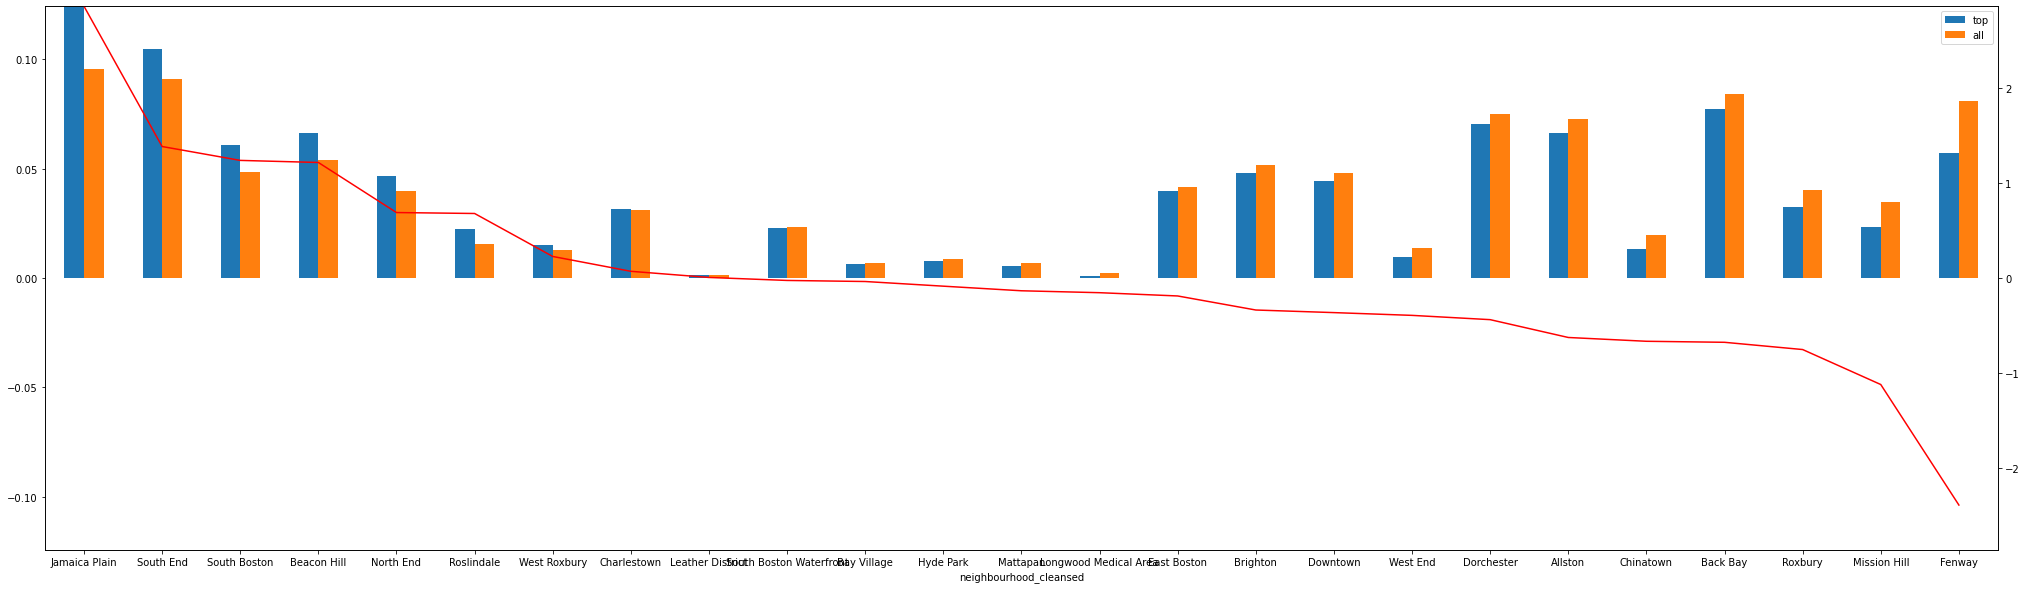

In [13]:
plot(nb)

- There is no big difference in the distribution of properties in the **neighborhoods** when we compare the top rated with the general. The biggest differences are in Jamaica Palin, which appears almost 2.8% (percentage points) among the top rated and in Fenway, which appears almost 2.4% less.

#### Property_type analysis:

In [18]:
pt = get_percents(df_boston_top, df_boston_values, 'property_type')

In [19]:
pt.head(2)

,top,all,dif
property_type,,,
House,0.177875,0.156764,2.111095
Condominium,0.074561,0.064435,1.012626


In [20]:
pt.tail(2)

,top,all,dif
property_type,,,
Other,0.002924,0.004742,-0.181800
Apartment,0.693957,0.728591,-3.463424


<Figure size 432x288 with 0 Axes>

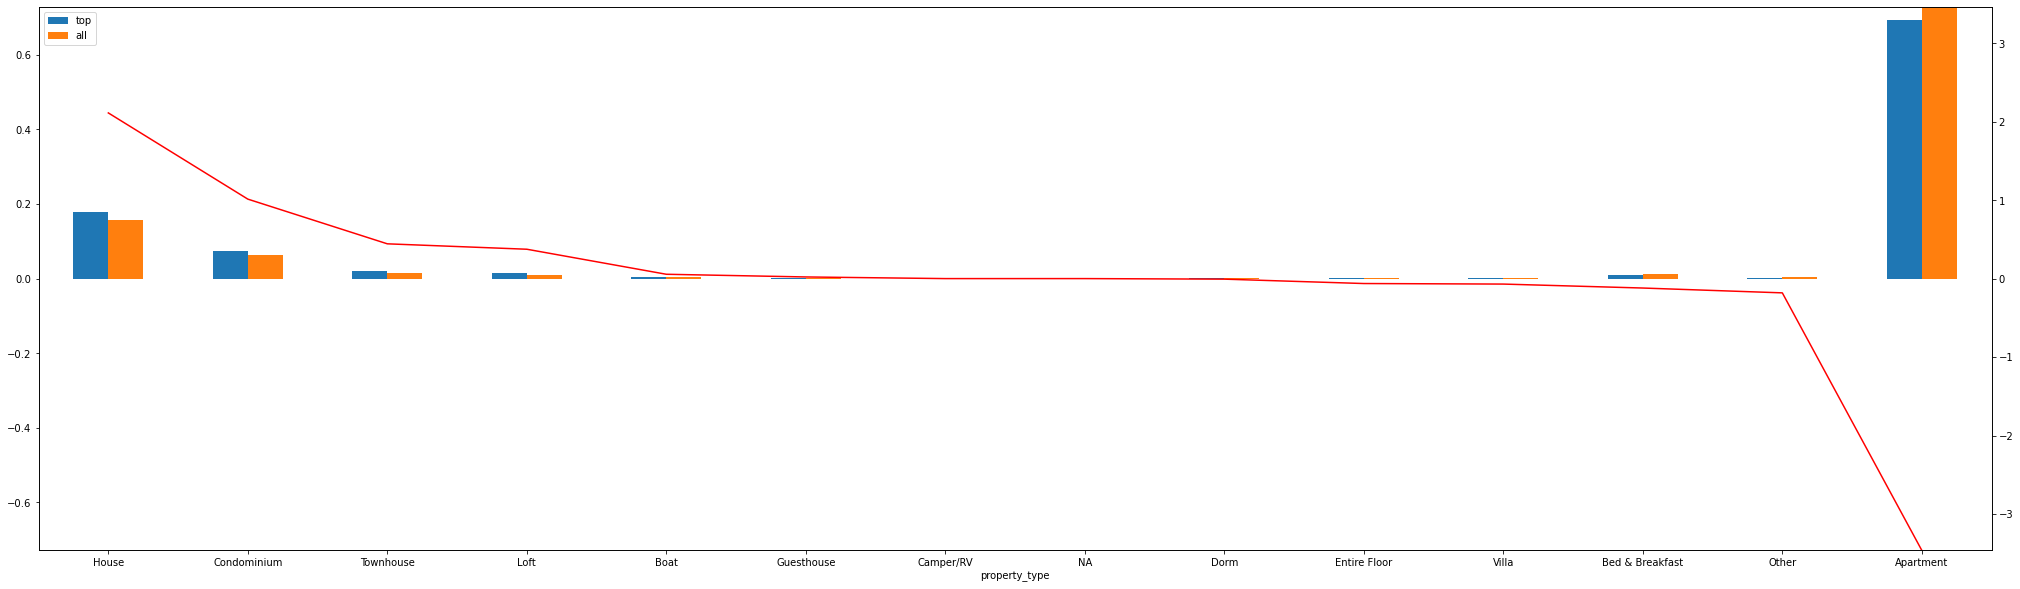

In [21]:
plot(pt)

- There is no big difference in the distribution of the **properties types** when we compare the top rated with the general. The biggest differences are in House, which appears 2% (percentage points) more among the top rated and in Apartment, which appears almost 3.5% less.



#### Room_type analysis:

In [22]:
rt = get_percents(df_boston_top, df_boston_values, 'room_type')

In [23]:
rt.head(2)

,top,all,dif
room_type,,,
Entire home/apt,0.596004,0.593305,0.269846
Private room,0.383528,0.384379,-0.085109


In [24]:
rt.tail(2)

,top,all,dif
room_type,,,
Private room,0.383528,0.384379,-0.085109
Shared room,0.020468,0.022315,-0.184737


<Figure size 432x288 with 0 Axes>

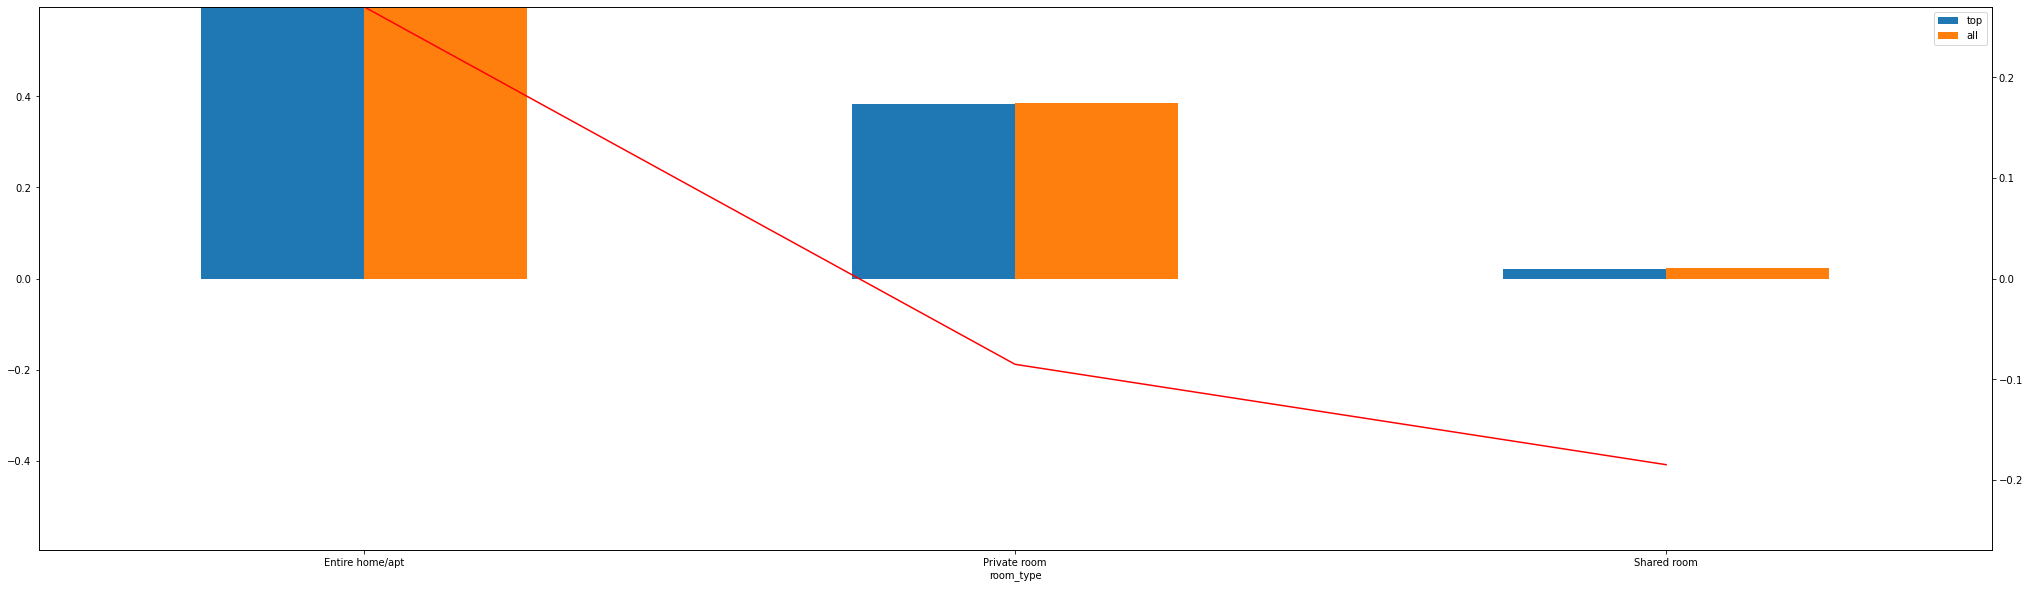

In [25]:
plot(rt)

- There is no big difference in the distribution of **room types** when we compare the top rated with the general. 

#### Bathrooms analysis:

In [26]:
bath = get_percents(df_boston_top, df_boston_values, 'bathrooms')

In [27]:
bath.head(2)

,top,all,dif
bathrooms,,,
1.0,0.773879,0.767364,0.651513
1.5,0.062378,0.058020,0.435864


In [28]:
bath.tail(2)

,top,all,dif
bathrooms,,,
NA,0.001949,0.003905,-0.195584
2.0,0.123294,0.133333,-1.003899


<Figure size 432x288 with 0 Axes>

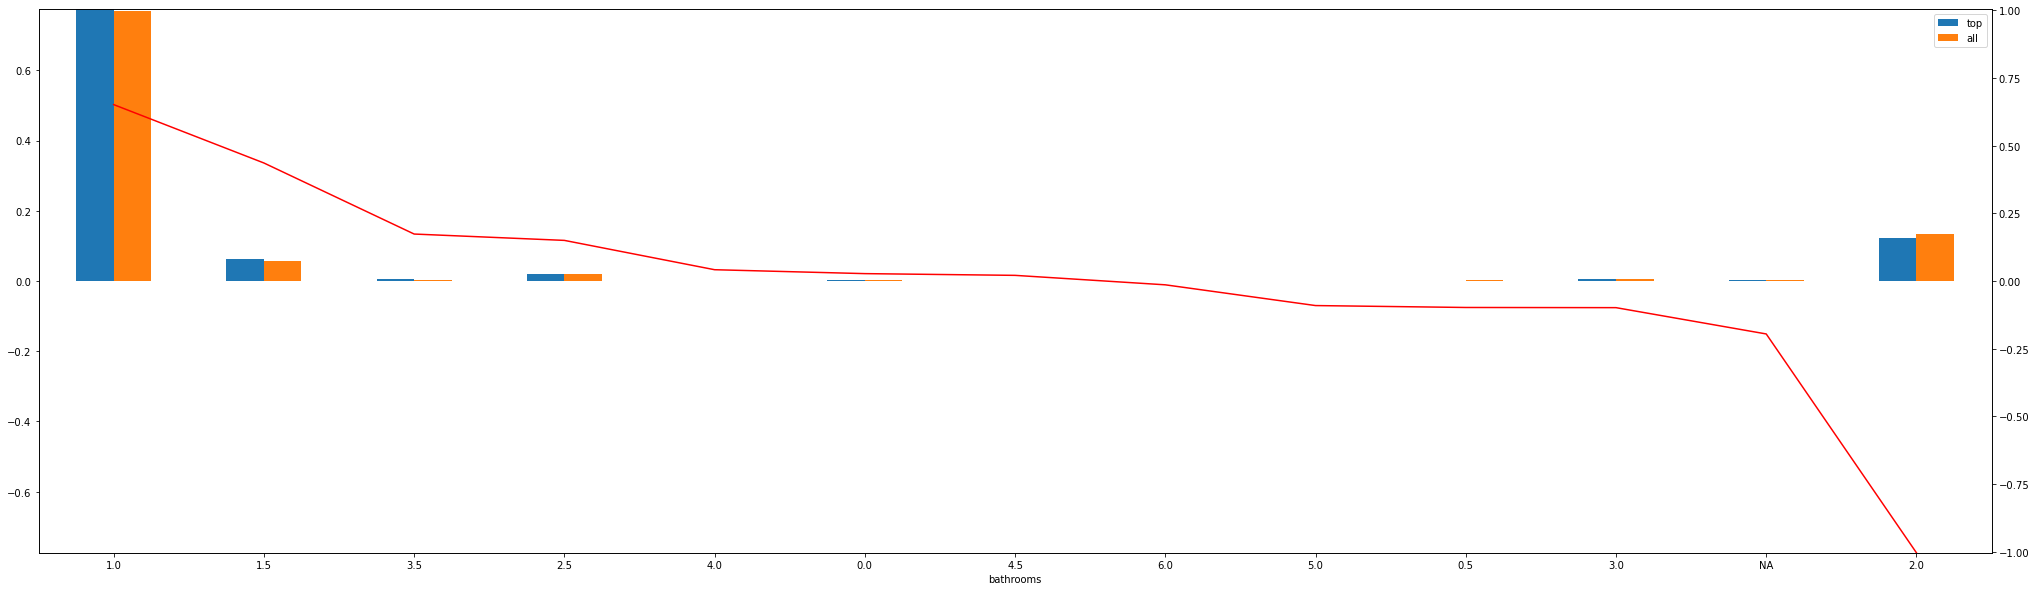

In [29]:
plot(bath)

- There is no big difference in the distribution of **bathroom quantity** when we compare the top rated with the general. The biggest differences are in properties with 2 bathrooms, which appears 1% (percentage point) more among the top rated.


#### Bedrooms analysis:

In [30]:
bed = get_percents(df_boston_top, df_boston_values, 'bedrooms')

In [31]:
bed.head(2)

,top,all,dif
bedrooms,,,
4.0,0.016082,0.012552,0.352957
1.0,0.666179,0.663598,0.258101


In [32]:
bed.tail(2)

,top,all,dif
bedrooms,,,
0.0,0.077485,0.080056,-0.257041
2.0,0.189571,0.193305,-0.373429


<Figure size 432x288 with 0 Axes>

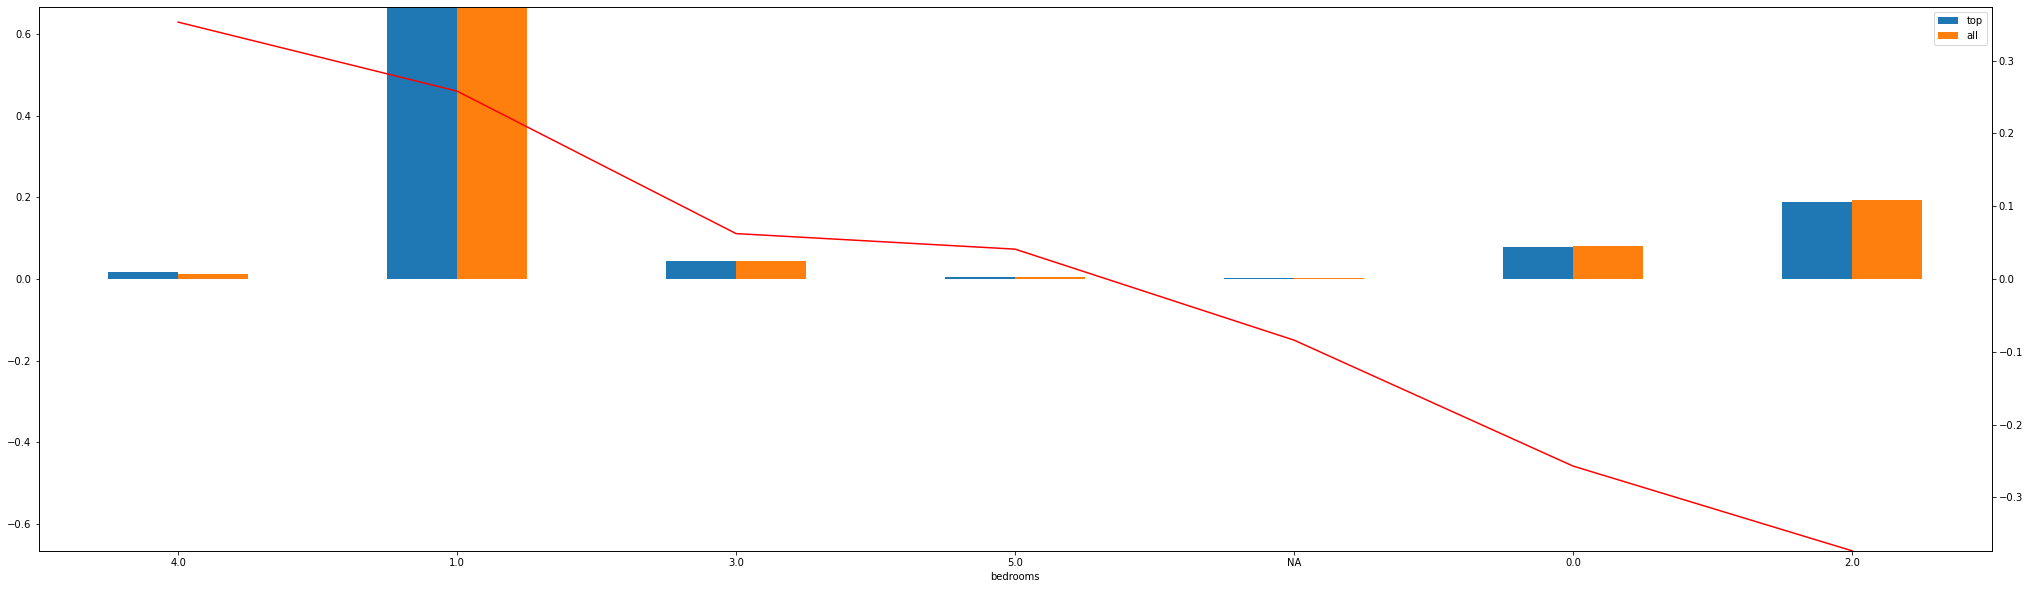

In [33]:
plot(bed)

- There is no big difference in the distribution of **beds quantity** when we compare the top rated with the general. 

#### Bed_type analysis:

In [34]:
bt = get_percents(df_boston_top, df_boston_values, 'bed_type')

In [35]:
bt.head(2)

,top,all,dif
bed_type,,,
Futon,0.016569,0.014226,0.234326
Pull-out Sofa,0.009747,0.008647,0.109945


In [36]:
bt.tail(2)

,top,all,dif
bed_type,,,
Couch,0.001949,0.002789,-0.084008
Real Bed,0.960039,0.963180,-0.314093


<Figure size 432x288 with 0 Axes>

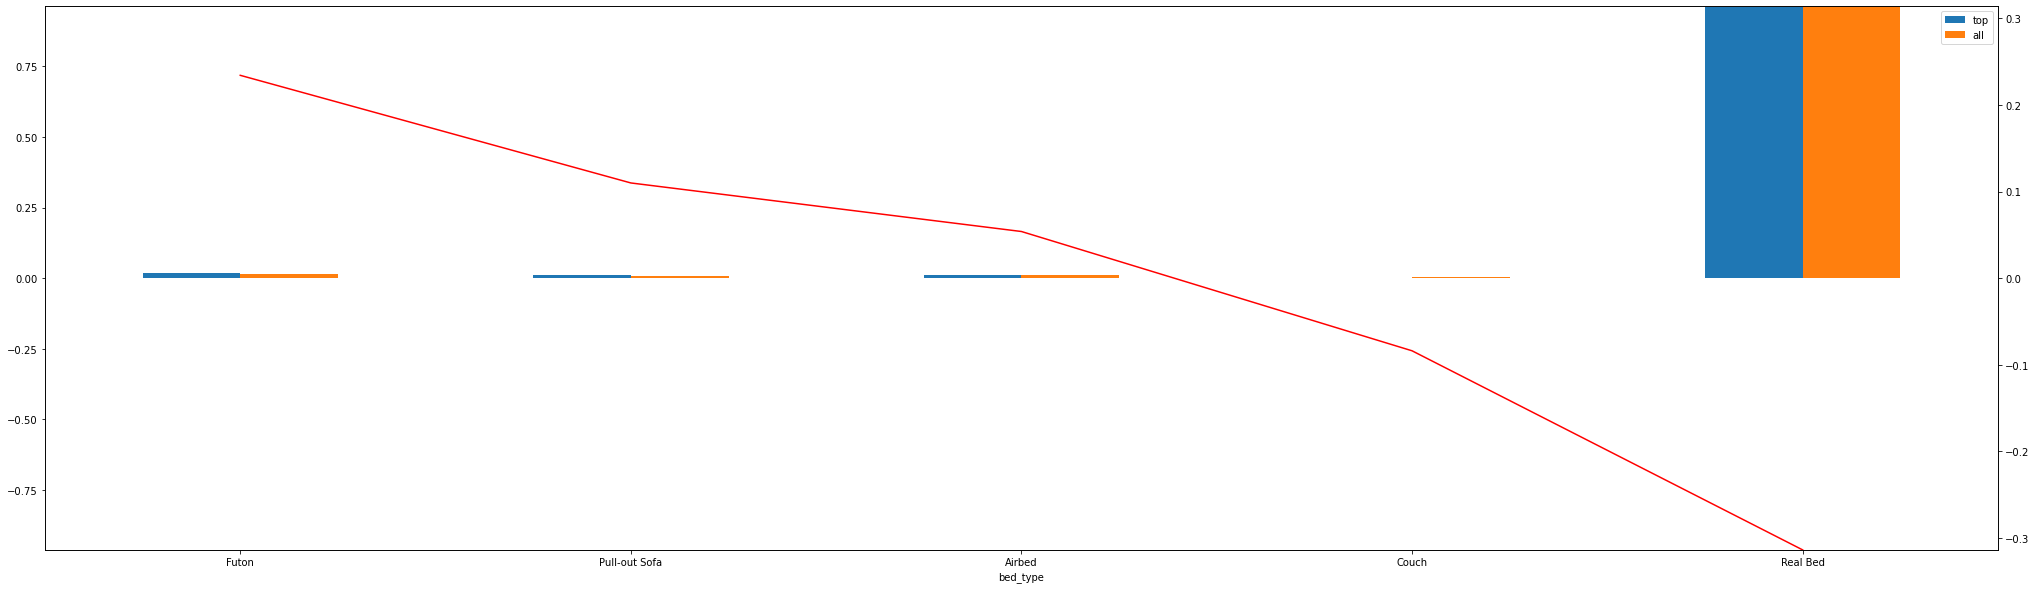

In [37]:
plot(bt)

- There is no big difference in the distribution of the **bed types** when we compare the top rated with the general. 

#### Amenities amount analysis:

In [38]:
aa = get_percents(df_boston_top, df_boston_values, 'amenities')

In [39]:
aa.head(2)

,top,all,dif
amenities,,,
20,0.068226,0.055230,1.299600
23,0.041910,0.031799,1.011117


In [40]:
aa.tail(2)

,top,all,dif
amenities,,,
8,0.014133,0.021199,-0.706689
10,0.033626,0.041283,-0.765739


<Figure size 432x288 with 0 Axes>

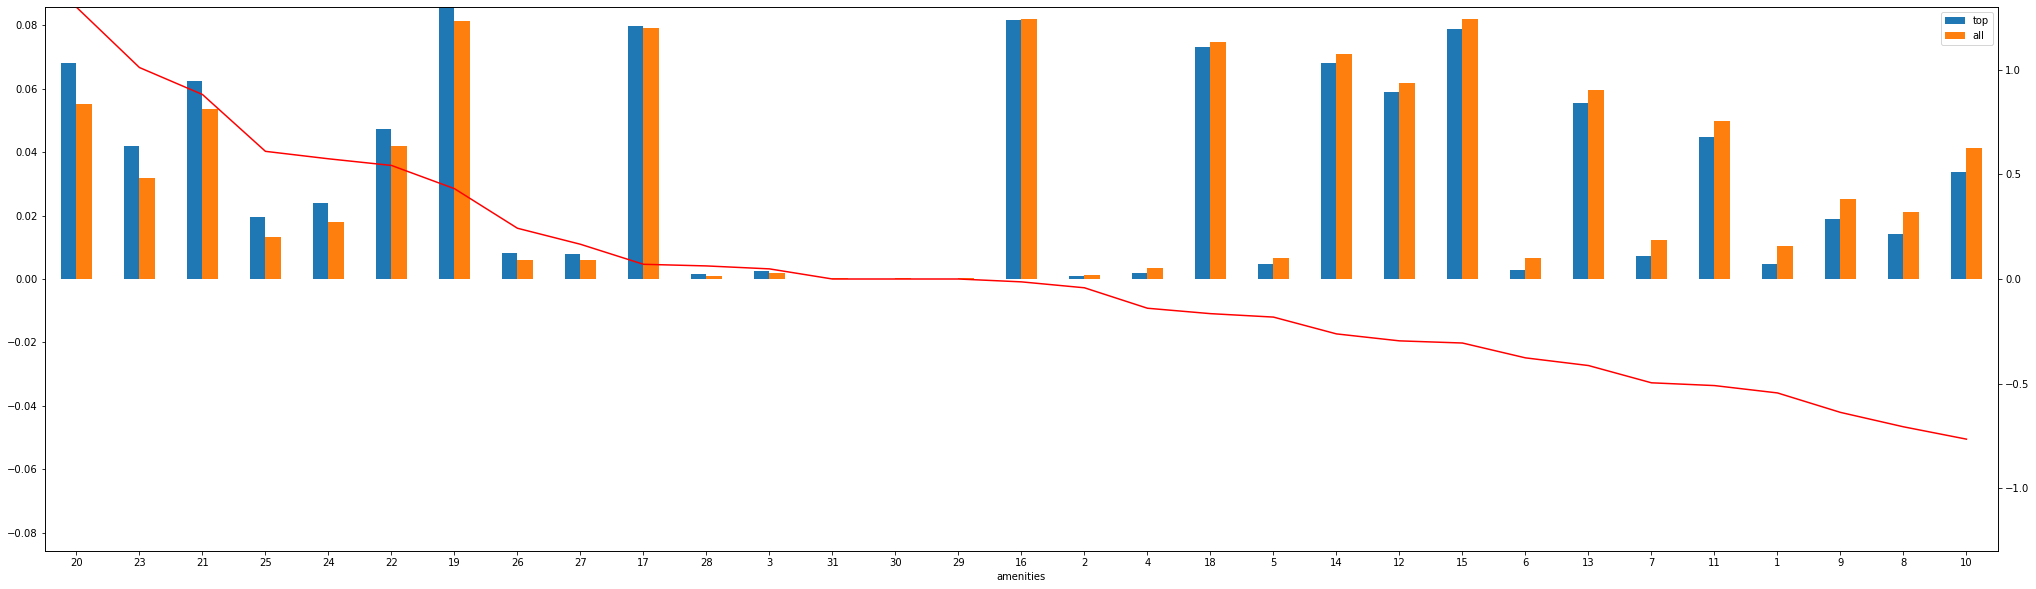

In [41]:
plot(aa)

- There is no big difference in the distribution of the **amenities quantity** when we compare the top rated with the general. The biggest differences are in properties with 20 and 23 amenities, which appears 1.3% and 1% (percentage point) more among the top rated.



#### Cancellation_policy analysis:

In [42]:
cp = get_percents(df_boston_top, df_boston_values, 'cancellation_policy')

In [43]:
cp.head(2)

,top,all,dif
cancellation_policy,,,
moderate,0.299220,0.256346,4.287439
strict,0.451754,0.441283,1.047126


In [44]:
cp.tail(2)

,top,all,dif
cancellation_policy,,,
super_strict_30,0.017544,0.023710,-0.616604
flexible,0.231481,0.278661,-4.717961


<Figure size 432x288 with 0 Axes>

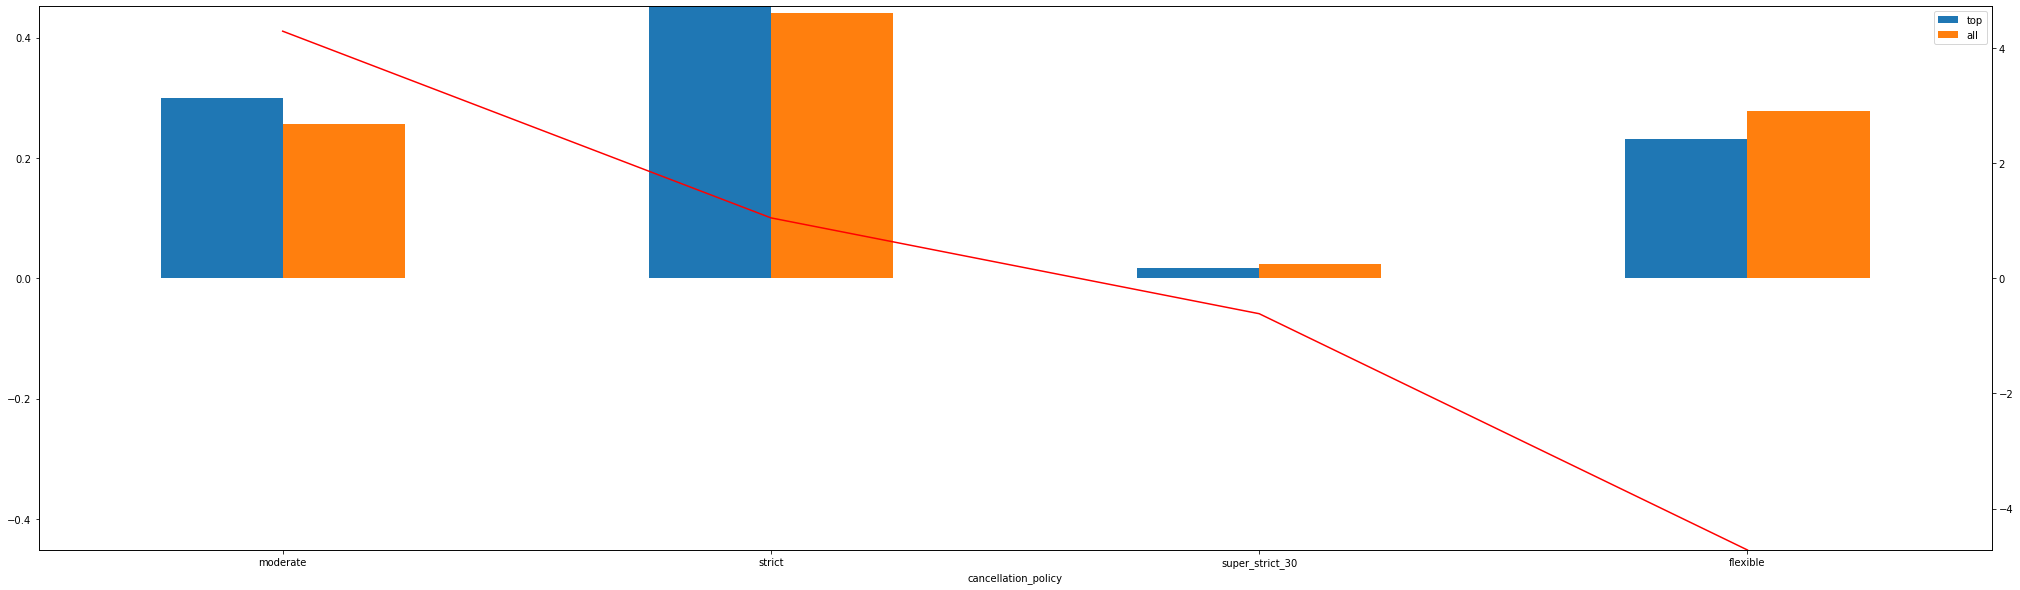

In [45]:
plot(cp)

- There is some difference in the distribution of the **cancelllation policy** when we compare the top rated with the general. The biggest differences are in properties with moderate, which appears 4.3% (percentage points) more among the top rated and in properties with flexible, which appears 4.7% less.



#### Analyzing Seattle data:

In [46]:
# looking into data
df_seattle_listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [47]:
# filter dataframe keeping the columns that are interesting
df_seattle_values = df_seattle_listings[['id','review_scores_rating','neighbourhood_cleansed','property_type','room_type','bathrooms','bedrooms','beds','bed_type','amenities','cancellation_policy',]]
df_seattle_values.describe(include='all')

,id,review_scores_rating,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy
count,3.818000e+03,3171.000000,3818,3817,3818,3802.000000,3812.000000,3817.000000,3818,3818,3818
unique,NaN,NaN,87,16,3,NaN,NaN,NaN,5,3284,3
top,NaN,NaN,Broadway,House,Entire home/apt,NaN,NaN,NaN,Real Bed,{},strict
freq,NaN,NaN,397,1733,2541,NaN,NaN,NaN,3657,45,1417
mean,5.550111e+06,94.539262,NaN,NaN,NaN,1.259469,1.307712,1.735394,NaN,NaN,NaN
std,2.962660e+06,6.606083,NaN,NaN,NaN,0.590369,0.883395,1.139480,NaN,NaN,NaN
min,3.335000e+03,20.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,3.258256e+06,93.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN
50%,6.118244e+06,96.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN
75%,8.035127e+06,99.000000,NaN,NaN,NaN,1.000000,2.000000,2.000000,NaN,NaN,NaN


In [48]:
# convert amenities list in quantity os amenities
df_seattle_values['amenities'] = df_seattle_values['amenities'].apply(lambda x: len(x.split(',')))

<ipython-input-48-f42119cada9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seattle_values['amenities'] = df_seattle_values['amenities'].apply(lambda x: len(x.split(',')))


In [49]:
# create dataframe with top rated properties
df_seattle_top = df_seattle_values[df_seattle_values['review_scores_rating']>=90]

# fills nan values with 'NA'
df_seattle_top=df_seattle_top.fillna('NA')
df_seattle_values = df_seattle_values.fillna('NA')
df_seattle_values.dtypes

id                         int64
review_scores_rating      object
neighbourhood_cleansed    object
property_type             object
room_type                 object
bathrooms                 object
bedrooms                  object
beds                      object
bed_type                  object
amenities                  int64
cancellation_policy       object
dtype: object

In [50]:
df_seattle_top.head(1)

,id,review_scores_rating,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,cancellation_policy
0,241032,95.0,West Queen Anne,Apartment,Entire home/apt,1,1,1.0,Real Bed,10,moderate


#### Neighbourhood_cleansed analysis:

In [56]:
s_nb = get_percents(df_seattle_top, df_seattle_values, 'neighbourhood_cleansed')

In [65]:
s_nb.head(7)

,top,all,dif
neighbourhood_cleansed,,,
Broadway,0.131092,0.110739,2.035243
Minor,0.056043,0.037657,1.838598
Belltown,0.082846,0.065272,1.757404
Fremont,0.060916,0.044073,1.684365
Wallingford,0.060429,0.046583,1.384587
Central Business District,0.039474,0.028731,1.074286
First Hill,0.039961,0.030126,0.983549


In [58]:
s_nb.tail(2)

,top,all,dif
neighbourhood_cleansed,,,
Haller Lake,0.003411,0.004184,-0.077279
University District,0.026316,0.034031,-0.771489


<Figure size 432x288 with 0 Axes>

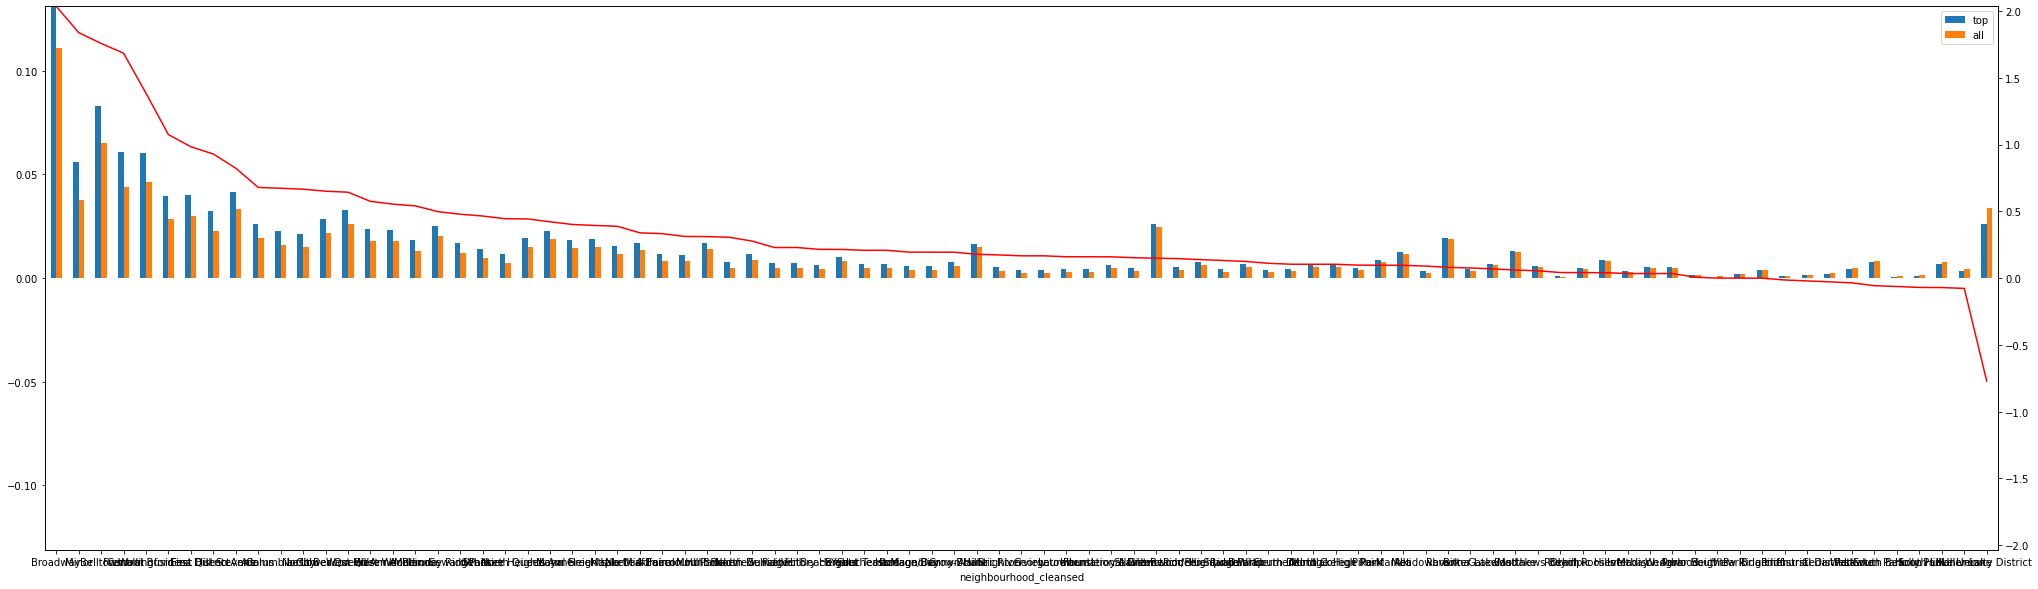

In [59]:
plot(s_nb)

- There is no big difference in the distribution of properties in the **neighborhoods** when we compare the top rated with the general. The biggest difference is in Broadway, which appears 2% (percentage points) more among the top rated.

#### Property_type analysis:

In [66]:
s_pt = get_percents(df_seattle_top, df_seattle_values, 'property_type')

In [67]:
s_pt.head(2)

,top,all,dif
property_type,,,
House,0.626218,0.483403,14.281526
Apartment,0.582846,0.476430,10.641644


In [68]:
s_pt.tail(2)

,top,all,dif
property_type,,,
Chalet,0.000487,0.000558,-0.007055
Dorm,0.000487,0.000558,-0.007055


<Figure size 432x288 with 0 Axes>

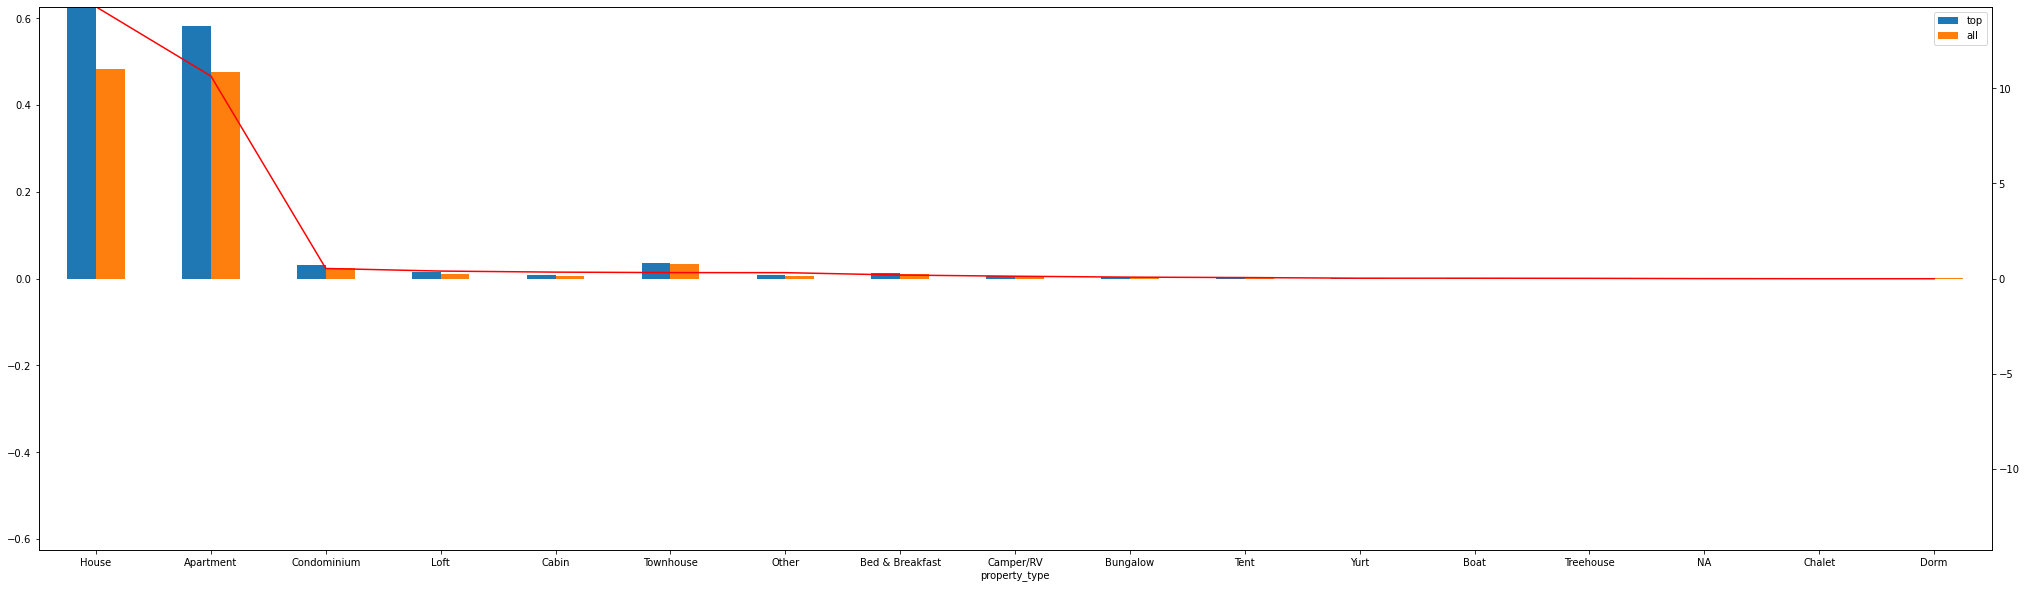

In [69]:
plot(s_pt)

- There is a big difference in the distribution of the **properties types** when we compare the top rated with the general. The biggest differences are at House and Apartment, which appears 14% and 10% (percentage points) more among the top rated.

#### Room_type analysis:

In [70]:
s_rt = get_percents(df_seattle_top, df_seattle_values, 'room_type')

In [71]:
s_rt.head(2)

,top,all,dif
room_type,,,
Entire home/apt,0.893762,0.708787,18.497557
Private room,0.408382,0.323570,8.481163


In [72]:
s_rt.tail(2)

,top,all,dif
room_type,,,
Private room,0.408382,0.323570,8.481163
Shared room,0.035575,0.032636,0.293907


<Figure size 432x288 with 0 Axes>

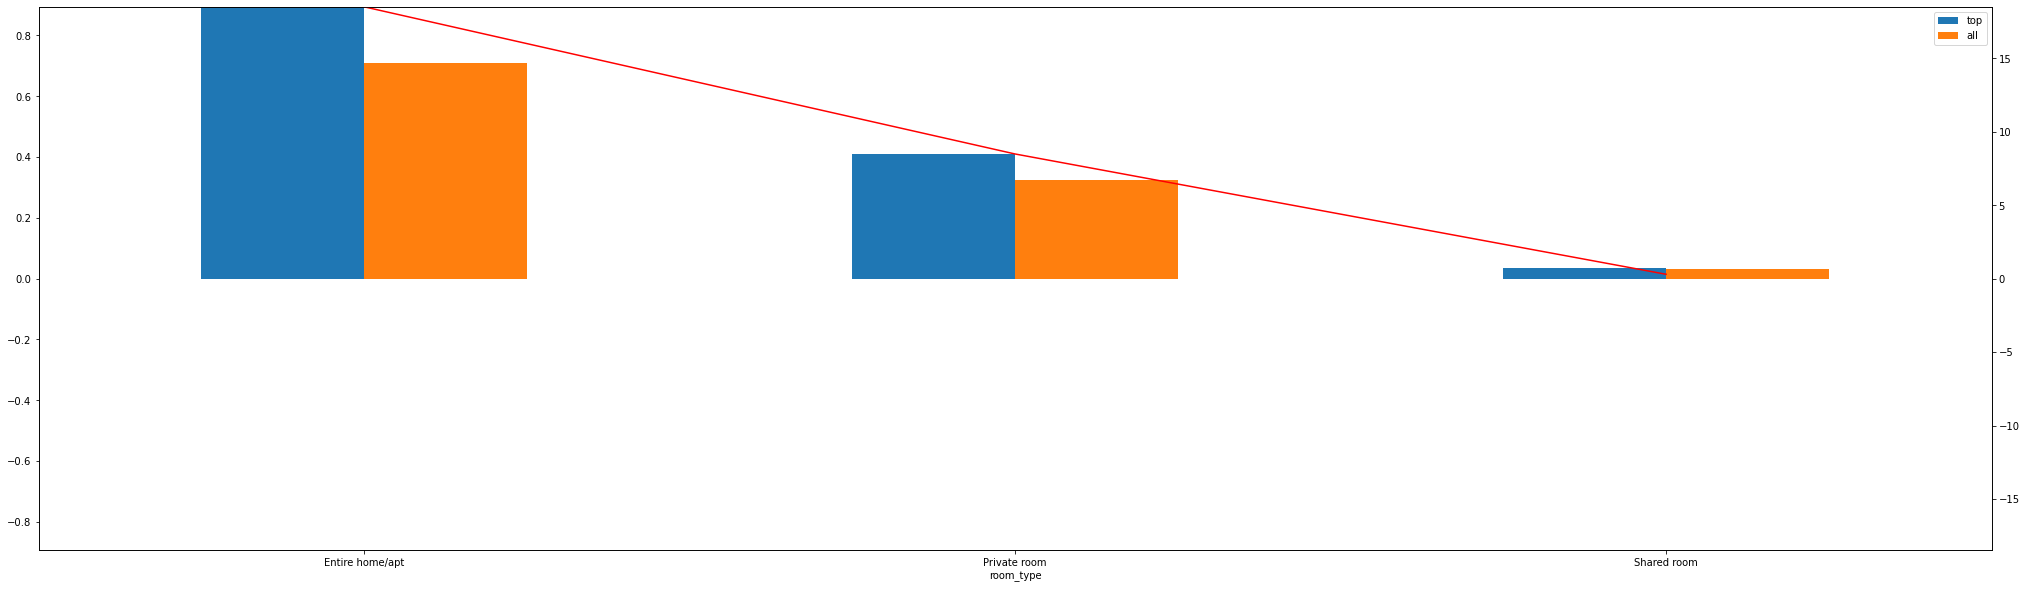

In [73]:
plot(s_rt)

- There is a big difference in the distribution of the **room types** when we compare the top rated with the general. The biggest differences are at Entire home/apart and Private, which appears 18% and 8% (percentage points) more among the top rated.

#### Bathrooms analysis:

In [74]:
s_bath = get_percents(df_seattle_top, df_seattle_values, 'bathrooms')

In [75]:
s_bath.head(2)

,top,all,dif
bathrooms,,,
1.0,1.011696,0.803905,20.779075
2.0,0.127193,0.104045,2.314835


In [76]:
s_bath.tail(2)

,top,all,dif
bathrooms,,,
NA,0.003899,0.004463,-0.056440
0.5,0.007797,0.008647,-0.084987


<Figure size 432x288 with 0 Axes>

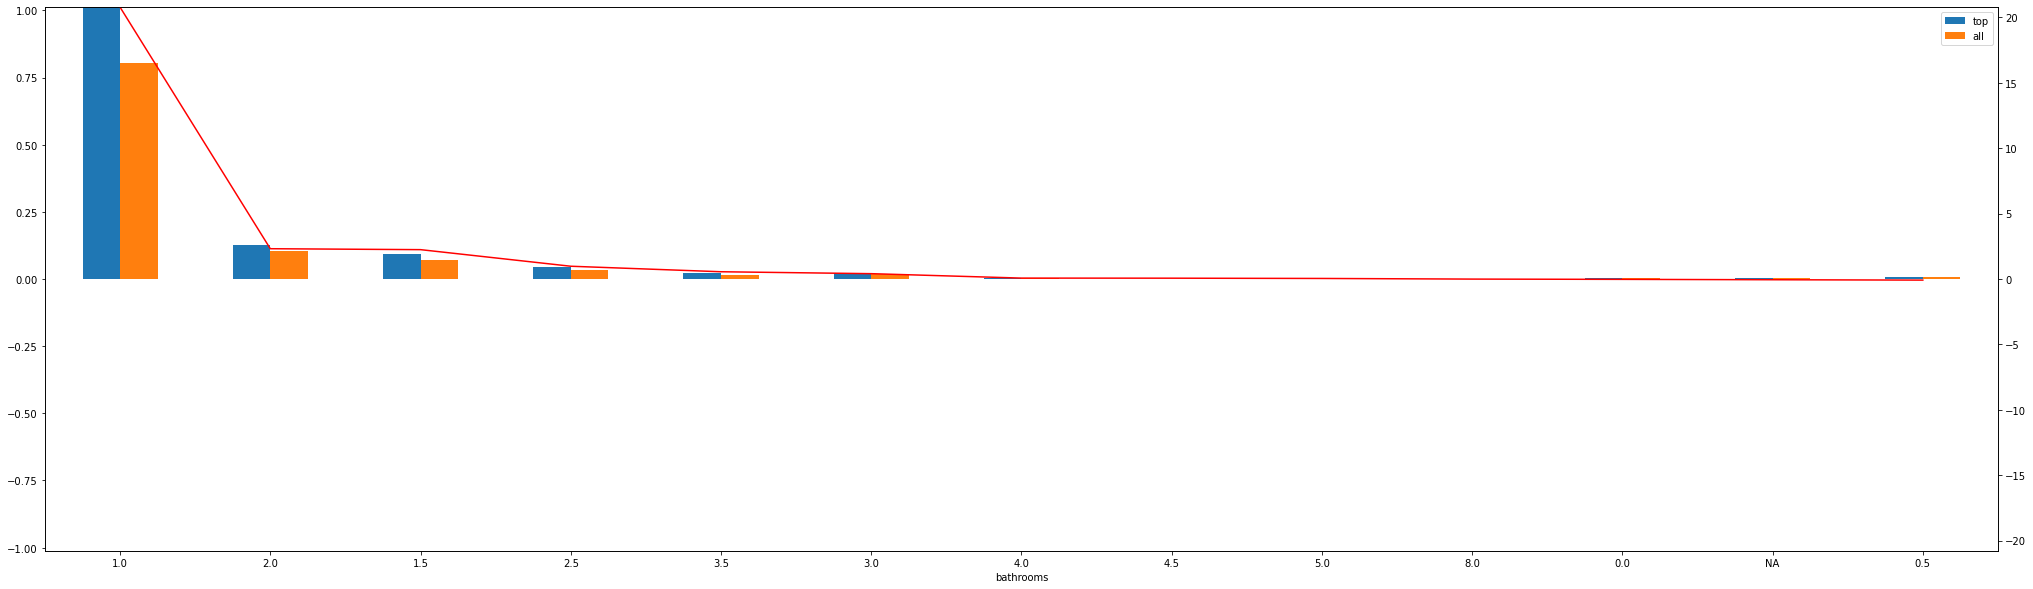

In [77]:
plot(s_bath)

- There is a big difference in the distribution of the **bathrooms** when we compare the top rated with the general. The biggest differences are athe properties with 1 bathroom, which appears 20% (percentage points) more among the top rated.

#### Bedrooms analysis:

In [78]:
s_bed = get_percents(df_seattle_top, df_seattle_values, 'bedrooms')

In [79]:
s_bed.head(2)

,top,all,dif
bedrooms,,,
1.0,0.856725,0.674198,18.252710
2.0,0.226608,0.178522,4.808657


In [80]:
s_bed.tail(2)

,top,all,dif
bedrooms,,,
7.0,0.000487,0.000279,0.020839
5.0,0.006823,0.006695,0.012805


<Figure size 432x288 with 0 Axes>

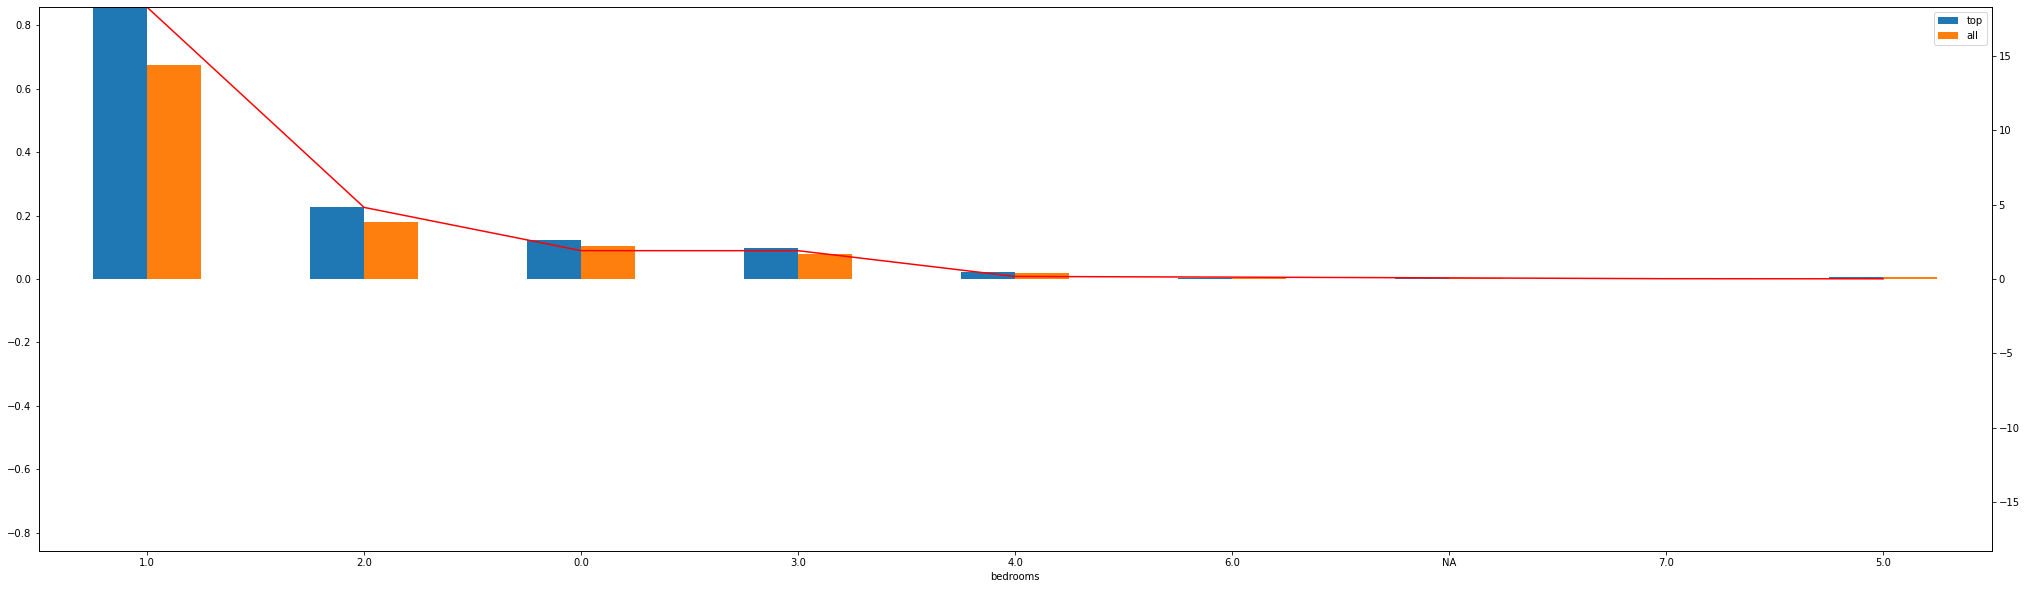

In [81]:
plot(s_bed)

- There is a big difference in the distribution of the **bedrooms** when we compare the top rated with the general. The biggest differences are at properties with 1 bedroom, which appears 18% (percentage points) more among the top rated.

#### Bed_type analysis:

In [82]:
s_bt = get_percents(df_seattle_top, df_seattle_values, 'bed_type')

In [83]:
s_bt.head(2)

,top,all,dif
bed_type,,,
Real Bed,1.284600,1.020084,26.451671
Futon,0.024854,0.020642,0.421224


In [84]:
s_bt.tail(2)

,top,all,dif
bed_type,,,
Airbed,0.008285,0.007531,0.075322
Couch,0.003411,0.003626,-0.021491


<Figure size 432x288 with 0 Axes>

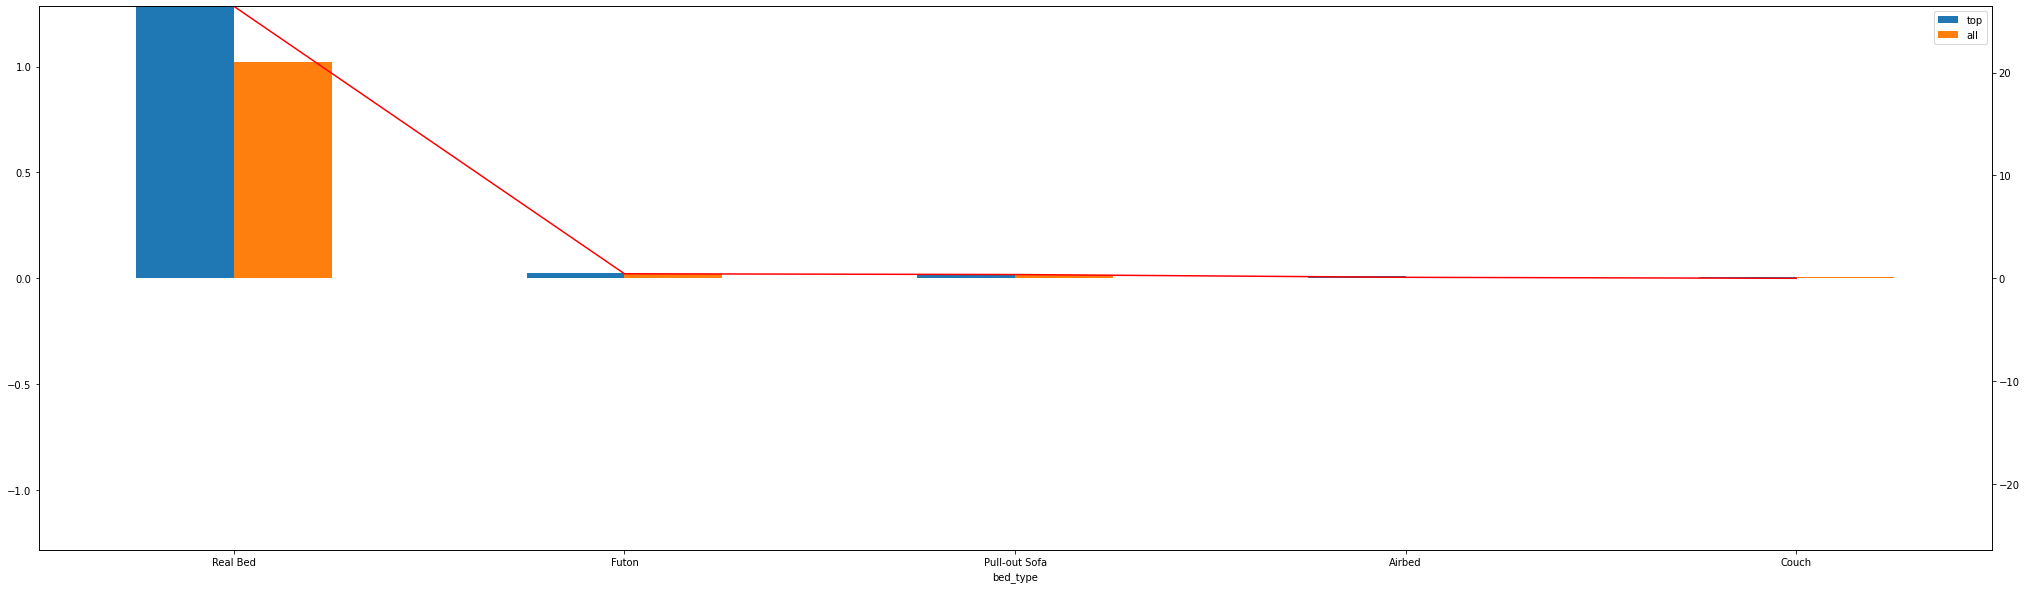

In [85]:
plot(s_bt)

- There is a big difference in the distribution of the **bed types** when we compare the top rated with the general. The biggest differences are at Real bed, which appears 26% (percentage points) more among the top rated.

#### Amenities amount analysis:

In [86]:
s_aa = get_percents(df_seattle_top, df_seattle_values, 'amenities')

In [91]:
s_aa.head(2)

,top,all,dif
amenities,,,
15,0.136452,0.102371,3.408125
13,0.122320,0.096513,2.580644


In [88]:
s_aa.tail(2)

,top,all,dif
amenities,,,
5,0.005361,0.006695,-0.133394
1,0.008772,0.012831,-0.405931


<Figure size 432x288 with 0 Axes>

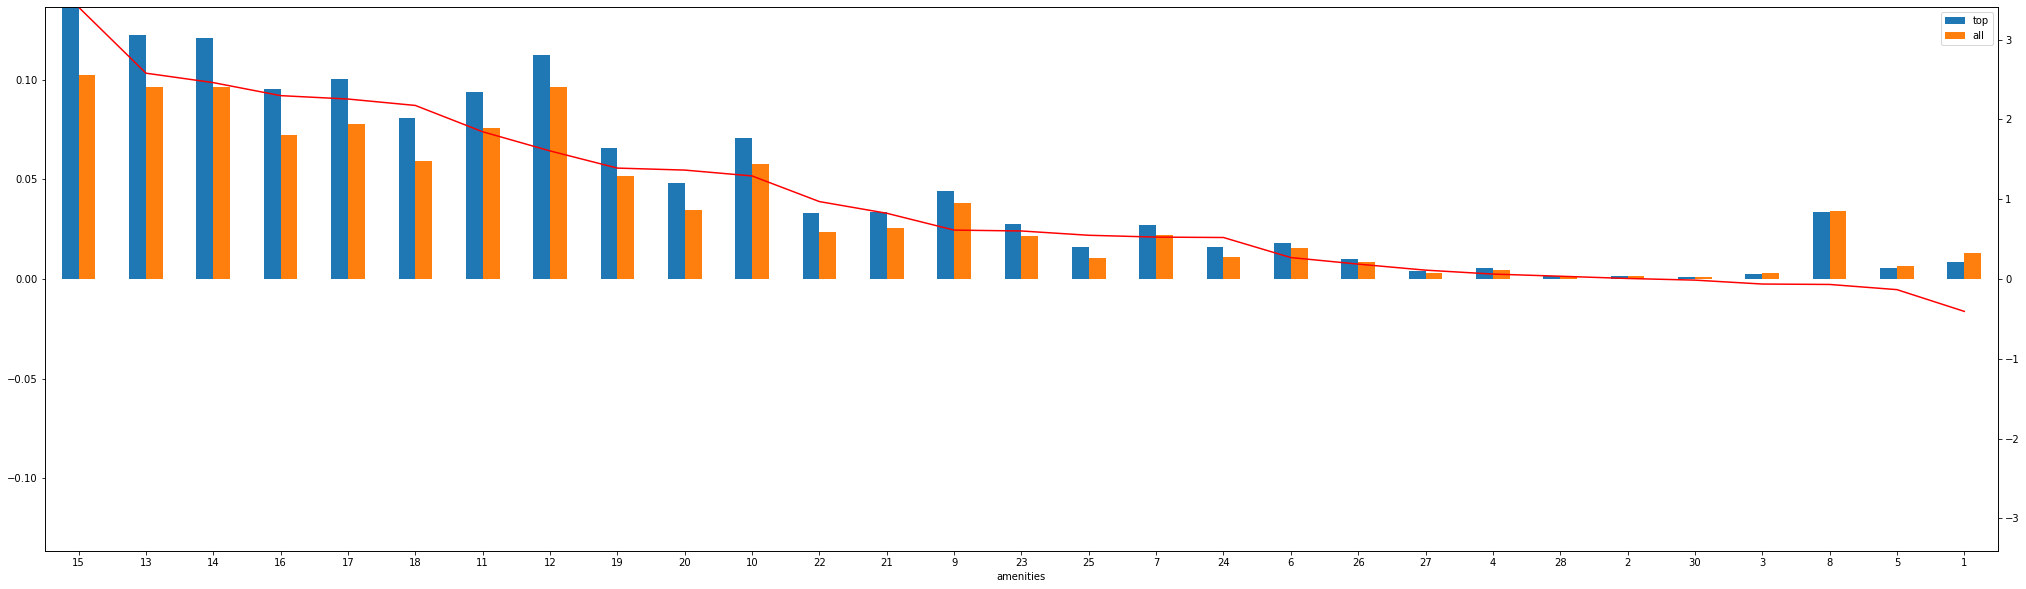

In [89]:
plot(s_aa)

- There is no big difference in the distribution of the **amenities quantity** when we compare the top rated with the general. The biggest differences are at properties with 15 amenities, which appears 3% (percentage points) more among the top rated.

#### Cancellation_policy analysis:

In [92]:
s_cp = get_percents(df_seattle_top, df_seattle_values, 'cancellation_policy')

In [93]:
s_cp.head(2)

,top,all,dif
cancellation_policy,,,
moderate,0.489279,0.348954,14.032478
strict,0.522904,0.395258,12.764646


In [94]:
s_cp.tail(2)

,top,all,dif
cancellation_policy,,,
strict,0.522904,0.395258,12.764646
flexible,0.325536,0.320781,0.475503


<Figure size 432x288 with 0 Axes>

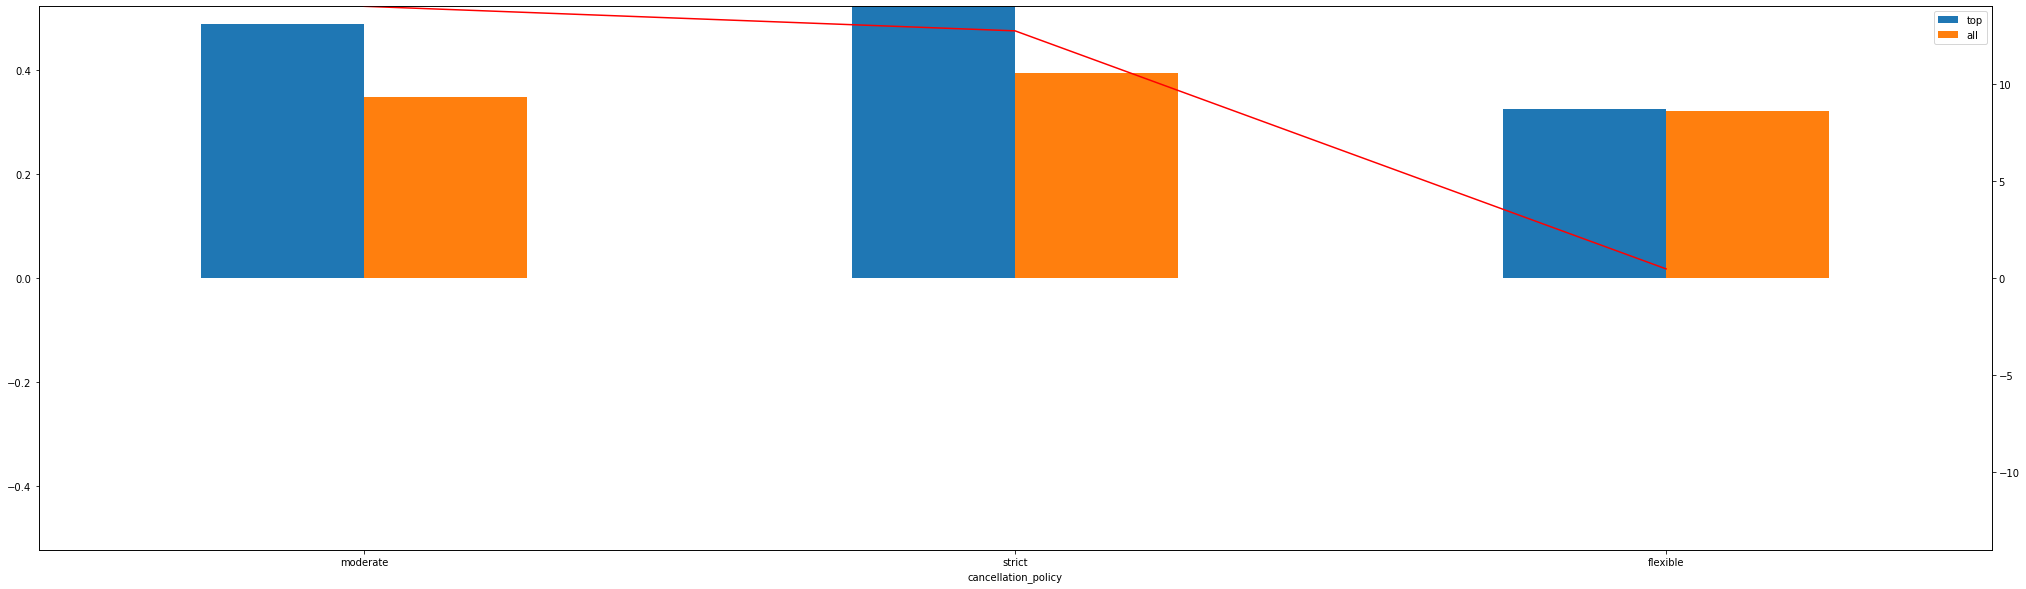

In [95]:
plot(s_cp)

- There is a big difference in the distribution of the **cancellation policy** when we compare the top rated with the general. The biggest differences are at Moderate and Strict, which appears 14% and 12% (percentage points) more among the top rated.

#### Comparing Boston and Seattle:

 - Looking at the Boston data, we see that it is not these characteristics that make a property be well evaluated. The differences in the number of characteristics found in the properties that are top rated for the general are very low and few are greater than 2%.The feature that concentrates the biggest differences between properties with a high rating (90+) and the general one is the cancellation policy. These data help to understand that some hypotheses that seem to be logical are not true, for example: bigger houses or with more amenities are better evaluated.
 
 - In Seattle, the differences are bigger. In general there is more concentration of better evaluations in properties that are House or Apartment, with 1 bathroom and 1 real bed. From this data, hypotheses can be raised to be validated, such as: those who stay in Seattle prefer smaller places, but with privacy and comfort to sleep.